<h1>Root Cause Analysis Using Pareto Principle</h1>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

<h2>Step 1: Load dataset from csv</h2>

In [32]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [33]:
df

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Japan,2023,Solar,40091.199325,46650.085012,5.589553e+09,819897975,1.110048e+14,574873.698448,57322.038062,...,57.159094,48.878098,60.276930,890,25,9992,883698,29.420472,1,0
2496,Australia,2017,Hydro,9454.189177,28506.752159,5.602669e+09,116522920,1.433965e+14,741594.182522,56635.966737,...,68.969915,85.799679,39.248237,898,77,6484,447626,73.280184,1,1
2497,India,2022,Geothermal,94329.590380,22757.496947,8.590460e+09,1409070574,5.582925e+13,922633.984945,85455.105274,...,32.759424,1.049568,51.281761,602,49,3535,535996,25.217499,0,1
2498,China,2000,Biomass,66206.311515,3530.005331,5.640793e+09,859850706,2.147667e+13,481213.409793,44933.818979,...,60.303422,29.261717,17.238731,520,46,249,21322,7.992712,1,0


<h2>Step 2a: Data Cleaning: Drop duplicate rows</h2>

In [7]:
df = df.drop_duplicates()
# df

<h2>Step 2b: Data Cleaning: Check missisng values</h2>

In [34]:
df.isnull().sum()
# no missing values

Country                                    0
Year                                       0
Energy Type                                0
Production (GWh)                           0
Installed Capacity (MW)                    0
Investments (USD)                          0
Population                                 0
GDP                                        0
Energy Consumption                         0
Energy Exports                             0
Energy Imports                             0
CO2 Emissions                              0
Renewable Energy Jobs                      0
Government Policies                        0
R&D Expenditure                            0
Renewable Energy Targets                   0
Average Annual Temperature                 0
Annual Rainfall                            0
Solar Irradiance                           0
Wind Speed                                 0
Hydro Potential                            0
Geothermal Potential                       0
Biomass Av

In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [36]:
numerical_cols

Index(['Year', 'Production (GWh)', 'Installed Capacity (MW)',
       'Investments (USD)', 'Population', 'GDP', 'Energy Consumption',
       'Energy Exports', 'Energy Imports', 'CO2 Emissions',
       'Renewable Energy Jobs', 'Government Policies', 'R&D Expenditure',
       'Renewable Energy Targets', 'Average Annual Temperature',
       'Annual Rainfall', 'Solar Irradiance', 'Wind Speed', 'Hydro Potential',
       'Geothermal Potential', 'Biomass Availability',
       'Energy Storage Capacity', 'Grid Integration Capability',
       'Electricity Prices', 'Energy Subsidies',
       'International Aid for Renewables', 'Public Awareness',
       'Energy Efficiency Programs', 'Urbanization Rate',
       'Industrialization Rate', 'Energy Market Liberalization',
       'Renewable Energy Patents', 'Educational Level',
       'Technology Transfer Agreements', 'Renewable Energy Education Programs',
       'Local Manufacturing Capacity', 'Import Tariffs on Energy Equipment',
       'Export Incent

In [37]:
# Calculate the correlation matrix; Not part of the Pareto analysis
corr_matrix = df[['Investments (USD)', 'GDP', 'Energy Consumption', 'Political Stability', 'Energy Storage Capacity', 'Energy Efficiency Programs', 'Urbanization Rate',
       'Industrialization Rate', 'Energy Market Liberalization', 'International Aid for Renewables', 'Economic Freedom Index', 'Ease of Doing Business', 'Innovation Index',
       'Number of Research Institutions','Energy Sector Workforce']].corr()

In [38]:
numeric_columns = [
    'Renewable Energy Jobs',
    'R&D Expenditure',
    'GDP',
    'CO2 Emissions',
    'Energy Consumption',
    'Government Policies',
    'Educational Level',
    'Energy Storage Capacity',
    'Energy Efficiency Programs',
    'Investments (USD)'
]

# Create a new DataFrame with just the specified columns
data_subset = df[numeric_columns]

In [39]:
# Calculate frequesncy on selected numeric columns: Not part of the Pareto analysis
frequency = df.groupby(['Investments (USD)', 'GDP', 'Energy Consumption', 'Political Stability', 'Energy Storage Capacity', 'Energy Efficiency Programs', 'Urbanization Rate',
       'Industrialization Rate', 'Energy Market Liberalization', 'International Aid for Renewables', 'Economic Freedom Index', 'Ease of Doing Business', 'Innovation Index',
       'Number of Research Institutions','Energy Sector Workforce']).size().reset_index(name='Frequency')

<h2>Step 3: Aggregation of 17 Selected Socio-economic Indicators</h2> 

In [40]:
# Aggregate data: calculate mean for each factor to analyze their impact
aggregated_data = df.agg({
    'Investments (USD)': 'mean',
    'Renewable Energy Jobs': 'mean',
    'R&D Expenditure': 'mean',
    'Population': 'mean',
    'GDP': 'mean',
    'Political Stability': 'mean',
    'Energy Efficiency Programs': 'mean',
    'CO2 Emissions': 'sum',
    'Energy Consumption': 'sum',
    'Government Policies': 'mean',
    'Urbanization Rate': 'mean',
    'Educational Level': 'mean',
    'Economic Freedom Index': 'mean',
    'Energy Market Liberalization': 'mean',
    'Number of Research Institutions': 'mean',
    'Energy Sector Workforce': 'mean',
    'Ease of Doing Business': 'mean'
}).reset_index()


In [41]:
aggregated_data

,index,0
0,Investments (USD),4.956155e+09
1,Renewable Energy Jobs,5.028961e+05
2,R&D Expenditure,5.004689e+09
3,Population,7.458927e+08
4,GDP,1.010745e+14
5,Political Stability,5.020835e+00
6,Energy Efficiency Programs,5.064000e-01
7,CO2 Emissions,1.228046e+09
8,Energy Consumption,1.239253e+09
9,Government Policies,5.088000e-01


In [42]:
# Rename the index for clarity
aggregated_data.columns = ['Factor', 'Total']

In [43]:
aggregated_data

,Factor,Total
0,Investments (USD),4.956155e+09
1,Renewable Energy Jobs,5.028961e+05
2,R&D Expenditure,5.004689e+09
3,Population,7.458927e+08
4,GDP,1.010745e+14
5,Political Stability,5.020835e+00
6,Energy Efficiency Programs,5.064000e-01
7,CO2 Emissions,1.228046e+09
8,Energy Consumption,1.239253e+09
9,Government Policies,5.088000e-01


<h2>Step 4: Sort the data based on the 'Total' column in descending order</h2>

In [44]:
# Sort the data based on the 'Total' column in descending order
sorted_data = aggregated_data.sort_values(by='Total', ascending=False)

<h2>Step 5: Calculate cumulative frequency</h2>

In [45]:
sorted_data['Cumulative Frequency'] = sorted_data['Total'].cumsum()

<h2>Step 6: Calculate cumulative percentage</h2>

In [46]:
# Calculate cumulative percentage
sorted_data['Cumulative Percentage'] = (sorted_data['Cumulative Frequency'] / 
                                         sorted_data['Total'].sum()) * 100

<h2>Step 7: Assign ranks based on sorted order</h2>

In [47]:
# Assign ranks based on sorted order
sorted_data['Ranking'] = range(1, len(sorted_data) + 1)

In [48]:
# Display the sorted and calculated data
sorted_data.reset_index(drop=True, inplace=True)
sorted_data

,Factor,Total,Cumulative Frequency,Cumulative Percentage,Ranking
0,GDP,1.010745e+14,1.010745e+14,99.986967,1
1,R&D Expenditure,5.004689e+09,1.010795e+14,99.991918,2
2,Investments (USD),4.956155e+09,1.010845e+14,99.996820,3
3,Energy Consumption,1.239253e+09,1.010857e+14,99.998046,4
4,CO2 Emissions,1.228046e+09,1.010869e+14,99.999261,5
5,Population,7.458927e+08,1.010877e+14,99.999999,6
6,Renewable Energy Jobs,5.028961e+05,1.010877e+14,100.000000,7
7,Energy Sector Workforce,5.020409e+05,1.010877e+14,100.000000,8
8,Number of Research Institutions,4.966604e+02,1.010877e+14,100.000000,9
9,Economic Freedom Index,5.073672e+01,1.010877e+14,100.000000,10


<h2>Step 8: Create Pareto Chart</h2>

Text(0.5, 0, 'Factors')

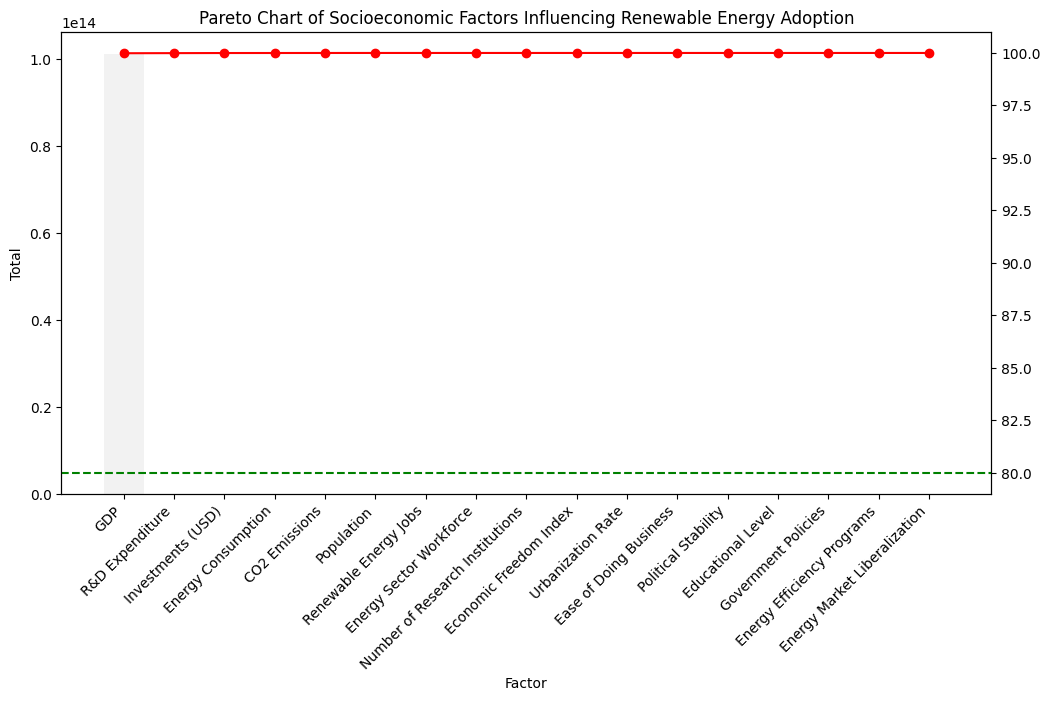

In [49]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')

# Bar plot for each factor's total contribution
sns.barplot(x='Factor', y='Total', data=sorted_data, color='#f2f2f2')

# Add cumulative percentage line
plt.twinx()
plt.plot(sorted_data['Factor'], sorted_data['Cumulative Percentage'], color='red', marker='o', label='Cumulative Percentage')
plt.axhline(80, color='green', linestyle='--', label='80% Line')

# Title and labels
plt.title('Pareto Chart of Socioeconomic Factors Influencing Renewable Energy Adoption')
plt.xlabel('Factors')

<h3>Aggregation without GDP to show distribution of other factors</h3>

In [50]:
# Remove the GDP row in the dataframe aggregated_data
new_agg_data = aggregated_data.drop([4])

In [51]:
# Sort the data based on the 'Total' column in descending order
new_sorted_data = new_agg_data.sort_values(by='Total', ascending=False)

In [52]:
# Calculate cumulative frequency
new_sorted_data['Cumulative Frequency'] = new_sorted_data['Total'].cumsum()

In [53]:
# Calculate cumulative percentage
new_sorted_data['Cumulative Percentage'] = (new_sorted_data['Cumulative Frequency'] / 
                                         new_sorted_data['Total'].sum()) * 100

In [54]:
# Assign ranks based on sorted order
new_sorted_data['Ranking'] = range(1, len(new_sorted_data) + 1)

In [55]:
# Display the sorted and calculated data
new_sorted_data.reset_index(drop=True, inplace=True)

<h3>Pareto Chart of Socioeconomic Factors without GDP</h3>

Text(0.5, 0, 'Factors')

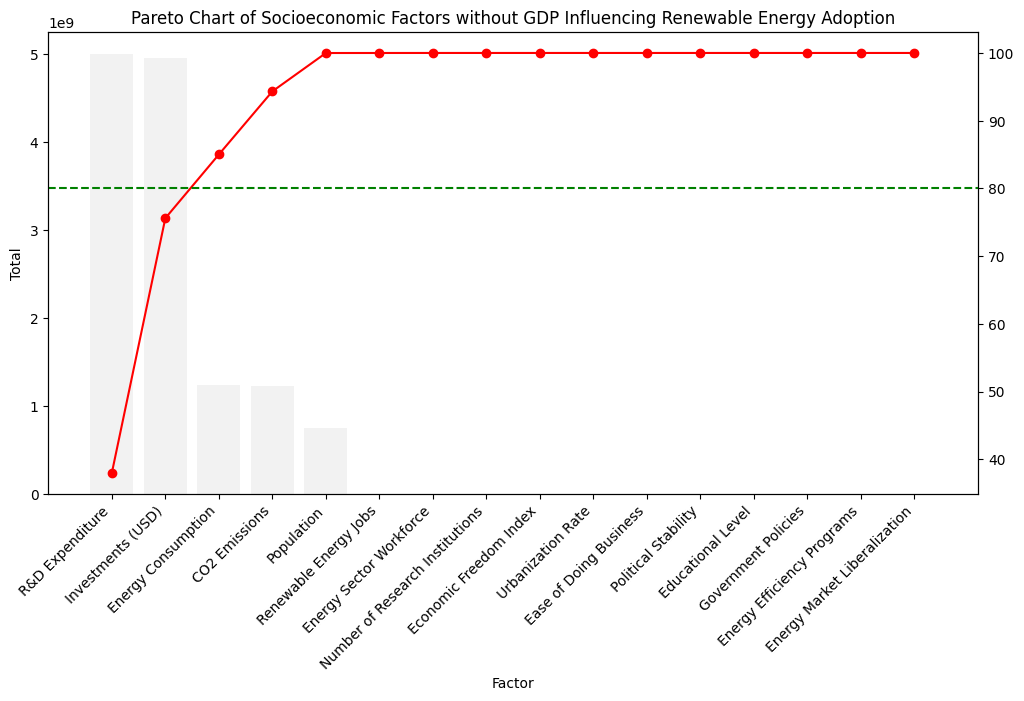

In [56]:
# Create the Pareto Chart
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')

# Bar plot for each factor's total contribution
sns.barplot(x='Factor', y='Total', data=new_sorted_data, color='#f2f2f2')

# Add cumulative percentage line
plt.twinx()
plt.plot(new_sorted_data['Factor'], new_sorted_data['Cumulative Percentage'], color='red', marker='o', label='Cumulative Percentage')
plt.axhline(80, color='green', linestyle='--', label='80% Line')

# Title and labels
plt.title('Pareto Chart of Socioeconomic Factors without GDP Influencing Renewable Energy Adoption')
plt.xlabel('Factors')

In [57]:
# Display the Pareto Table
new_sorted_data

,Factor,Total,Cumulative Frequency,Cumulative Percentage,Ranking
0,R&D Expenditure,5.004689e+09,5.004689e+09,37.986136,1
1,Investments (USD),4.956155e+09,9.960844e+09,75.603891,2
2,Energy Consumption,1.239253e+09,1.120010e+10,85.009957,3
3,CO2 Emissions,1.228046e+09,1.242814e+10,94.330960,4
4,Population,7.458927e+08,1.317404e+10,99.992367,5
5,Renewable Energy Jobs,5.028961e+05,1.317454e+10,99.996184,6
6,Energy Sector Workforce,5.020409e+05,1.317504e+10,99.999995,7
7,Number of Research Institutions,4.966604e+02,1.317504e+10,99.999999,8
8,Economic Freedom Index,5.073672e+01,1.317504e+10,99.999999,9
9,Urbanization Rate,4.894690e+01,1.317504e+10,100.000000,10


<h4>Findings</h4>

<p>According to the Pareto Principle (80/20 rule), focus on the top factors that account for approximately 80% of the effects. In this case, GDP, R&D Expenditure, and Investments (USD) may emerge as the vital view.</p>